<a href="https://colab.research.google.com/github/turbocradozaure/python-class/blob/S3/Copie_de_Python_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming for Business Analytics - Basics of Python - III

## Modules

Python has a rich standard library.

Most common modules are numpy, pandas, scikit-learn, matplotlib,...

In [ ]:
# importing a whole module
import math

# Calculating the square root
print("Square root of 16:", math.sqrt(16))

# Calculating sine of 90 degrees (convert degrees to radians first)
print("Sine of 90 degrees:", math.sin(math.radians(90)))

In [ ]:
# Use aliases to shorten module names or improve readability.

import math as m

# Using the alias
print("Cosine of 45 degrees:", m.cos(m.radians(45)))

In [ ]:
# You can import specific functions from a module to avoid importing everything.

from math import sqrt, pi

print("Value of pi:", pi)
print("Square root of 25:", sqrt(25))

In [ ]:
from random import randint

randint(0,100)

In [ ]:
# getting module version
# not all packages have a property version
import pandas as pd
print(pd.__version__)

In [ ]:
import random
try:
  print(random.__version__)
except:
  print("random module has no attribute version!")

In [ ]:
# list of all atributes
dir(random)

In [ ]:
# more detailed information about a specific method (or any attribute)
help(random.randint)

**list of preinstalled modules**

In [ ]:
!pip list

**what if module is not preinstalled on google colab**

In [ ]:
try:
  import janitor
except:
  print("Module is not preinstalled!Installing now...")
  !pip install pyjanitor --quiet

In [ ]:
import janitor

In [ ]:
# Example Code for Connecting to Google Drive
from google.colab import drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

In [ ]:
# Verifying Drive Connection
import os
print("Listing files in the root directory of Google Drive:")
print(os.listdir('/content/drive/My Drive'))

### Tasks

In [ ]:
# test if randint is a random function regarding the distribution of even and odd numbers
# in a large list there should be 50/50 even/odd numbers
# create 1000 random numbers betweeb 1 and 10 000
# count list and odd numbers

## Pandas - basics

- Python Data Analysis Library
- originally written by Wes McKinney
- creates a Python object with rows and columns called data frame

Pandas 'From' Methods,Pandas 'To' Methods
- pd.read_csv(),df.to_csv()
- pd.read_excel(),df.to_excel()
- pd.read_json(),df.to_json()
- pd.read_sql(),df.to_sql()
- pd.read_html(),df.to_html()
- pd.read_parquet(),df.to_parquet()
- pd.read_orc(),df.to_orc()
- pd.read_feather(),df.to_feather()
- pd.read_pickle(),df.to_pickle()
- pd.read_clipboard(),df.to_clipboard()

In [ ]:
import pandas as pd

In [ ]:
# Creating DataFrames and Series
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85.5, 90.0, 95.0]
}
df = pd.DataFrame(data)
print(df)

**dataframe vs. series**

A Pandas DataFrame is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It's like a spreadsheet or SQL table. Structure: It consists of:
Rows: Represent individual observations or records.
Columns: Represent different variables or features.
Index: Labels for the rows.
Columns: Labels for the columns.

A Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, Python objects, etc.). It's essentially a single column of data. Structure: It has two main components:
Data: The actual values stored in the Series.
Index: Labels for each data point, similar to row labels in a spreadsheet.

In [ ]:
series = pd.Series([1, 2, 3, 4], name="Numbers")
print(series)

### Importing data and simple checks

In [ ]:
cars = pd.read_excel("https://github.com/urosgodnov/datasets/raw/master/norway_new_car_sales_by_model.xlsx", engine="openpyxl")
cars.head()

In [ ]:
diabetes=pd.read_csv("https://raw.githubusercontent.com/urosgodnov/datasets/refs/heads/master/diabetes.csv")
diabetes.head()

In [ ]:
# last 5 rows
diabetes.tail()

In [ ]:
# column types and memory
diabetes.info()

In [ ]:
# number of rows and columns
diabetes.shape

In [ ]:
# simple statistics
diabetes.describe()

In [ ]:
# correlations
diabetes.corr()

In [ ]:
# histograms
diabetes.hist(figsize=(10,10))

In [ ]:
# skewness
diabetes.skew()

In [ ]:
# list of columns
diabetes.columns

In [ ]:
# frequrncy distribution
diabetes["Number_of_times_pregnant"].value_counts()

In [ ]:
# cleaning column names
# tip: try to always clean columns name after you import dataset
from janitor import clean_names

diabetes = clean_names(diabetes)
diabetes.columns


**Parquet file type**

A Parquet file is a columnar storage file format designed for efficient data processing and analytics. It organizes data by columns rather than rows, enabling faster queries for specific fields, reduced storage due to better compression, and improved performance for large-scale analytics tasks.

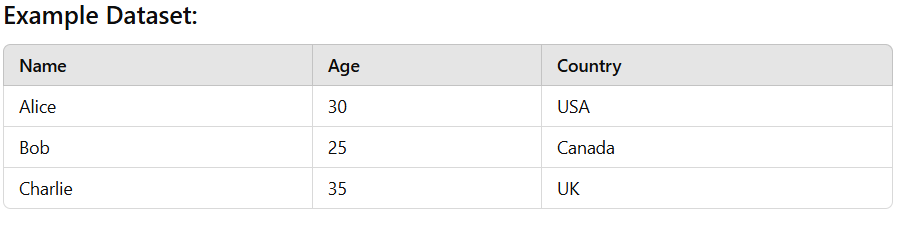

Row-based File (e.g., CSV):
Stored row by row:

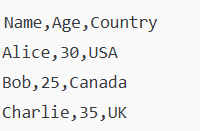


Columnar File (Parquet):
Stored column by column:

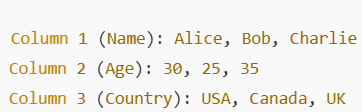

In [ ]:
import os

file_path = "/content/drive/MyDrive/Pandas_data/yellow_tripdata_2024-07.parquet"

if os.path.exists(file_path):
    dfnyc = pd.read_parquet(file_path)
else:
    print(f"Error: File '{file_path}' does not exist.")

In [ ]:
dfnyc.info()

### Exporting data

In [ ]:
diabetes.to_excel("diabetes.xlsx", index=False)

### Task

In [ ]:
# How many unique weight values are present in dataframe?
# How many rows and columns does the dataframe have?
# How much memory does dataframe use?
# Perform summary statistics for numerical columns. What is the mean and std of the height column?
# What is the correlation between height and weight?

master=pd.read_csv("https://github.com/urosgodnov/datasets/blob/master/Master.csv")

### Subsetting

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'Salary': [50000, 60000, 55000, 70000],
    'Department': ['HR', 'IT', 'Finance', 'IT']
}

df = pd.DataFrame(data)

In [ ]:
# Subsetting Columns
subset_columns = df[['Name', 'Age']]
print("Subset of columns:\n", subset_columns)

In [ ]:
# Subsetting Rows by Conditions
subset_rows = df[df['Salary'] > 55000]
print("\nSubset of rows where Salary > 55000:\n", subset_rows)

In [ ]:
# Adding a Calculated Column
df['Annual Bonus'] = df['Salary'] * 0.1
print("\nDataFrame with calculated 'Annual Bonus' column:\n", df)

In [ ]:
# Multiple Conditions for Subsetting
subset_multiple_conditions = df[(df['Salary'] > 55000) & (df['Department'] == 'IT')]
print("\nSubset with multiple conditions:\n", subset_multiple_conditions)

In [ ]:
# Subsetting with loc
subset_loc = df.loc[df['Age'] > 25, ['Name', 'Salary']]
print("\nSubset using loc:\n", subset_loc)

In [ ]:
# Subsetting with iloc
subset_iloc = df.iloc[1:3, 0:3]  # Rows 1-2 (inclusive of 1, exclusive of 3), Columns 0-2
print("\nSubset using iloc:\n", subset_iloc)

**apply function**

The apply function is a powerful pandas method used to apply a function along an axis of a DataFrame or Series.



In [ ]:
# Adding a Case Statement
# This applies the case_statement function to each row of the DataFrame.
def case_statement(row):
    if row['Age'] < 25:
        return 'Young'
    elif 25 <= row['Age'] < 30:
        return 'Mid-age'
    else:
        return 'Experienced'

df['Experience Level'] = df.apply(case_statement, axis=1)
df

**case_when function**

np.select

The np.select function is a NumPy method used for element-wise evaluation based on multiple conditions.

In [ ]:
# Adding a Case When Equivalent
# condlist: A list of conditions. Each condition is a Boolean expression that is evaluated for each row of the DataFrame.
# choicelist: A list of values to assign. The values in this list correspond to the conditions in the condlist.
# default: A value to assign if none of the conditions in condlist are True.

import numpy as np

df['Experience Category'] = np.select(
    condlist=[
        df['Age'] < 25,
        (df['Age'] >= 25) & (df['Age'] < 30),
        df['Age'] >= 30
    ],
    choicelist=['Young', 'Mid-age', 'Experienced'],
    default='Unknown'
)

df

### Advanced topics

**Pandas profiling**

In [ ]:
!pip install ydata-profiling sweetviz > /dev/null 2>&1

In [ ]:
import sweetviz as sv
import ydata_profiling as ydp

In [ ]:
ydp.ProfileReport(diabetes)

In [ ]:
# targeting dependent variable
report = sv.analyze(diabetes, target_feat='class_variable')
report.show_html()

### Tasks

In [ ]:
# Subset rows where 'Age' is less than 30 and only include 'Name' and 'Age' columns.

In [ ]:
# Add a new column called 'Tax' that is 20% of the 'Salary'.

In [ ]:
# Create a subset of rows where 'Department' is 'IT' and display only the 'Name' and 'Salary'.

In [ ]:
# Add a new column 'Salary After Tax' that calculates the 'Salary' after deducting the 'Tax'.

In [ ]:
# Using np.select, classify employees based on their 'Salary':
# 'Low Income' if Salary < 55000
# 'Middle Income' if 55000 <= Salary < 65000
# 'High Income' if Salary >= 65000

### Solutions

In [ ]:
df.loc[df['Age'] < 30, ['Name', 'Age']]

In [ ]:
df['Tax'] = df['Salary'] * 0.2

In [ ]:
df.loc[df['Department'] == 'IT', ['Name', 'Salary']]

In [ ]:
df['Salary After Tax'] = df['Salary'] - df['Tax']

In [ ]:
df['Income Level'] = np.select(
    condlist=[
        df['Salary'] < 55000,
        (df['Salary'] >= 55000) & (df['Salary'] < 65000),
        df['Salary'] >= 65000
    ],
    choicelist=['Low Income', 'Middle Income', 'High Income'],
    default='Unknown'
)